In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
from utils.xcs_utils import *

In [4]:
exploration_cycles = 0
exploitation_cycles = 5000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ A □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 1
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = 0.000001               # p_I
algorithm.initial_error = 0.000001            # epsilon_I
algorithm.initial_fitness = 0.000001           # F_I
algorithm.wildcard_probability = 0.0

In [6]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=1,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment


In [7]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,50,50,50
100,21,334,1600
200,13,392,1600
300,50,428,1600
400,40,450,1600
500,50,424,1600
600,50,424,1600
700,50,435,1600
800,50,447,1600


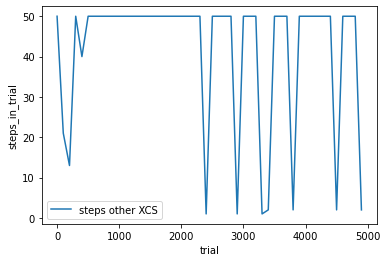

In [8]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

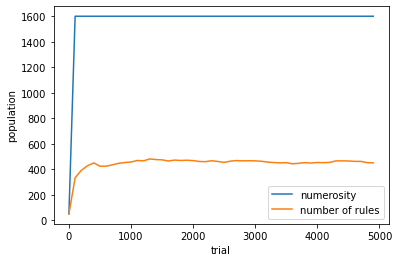

In [9]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [10]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 25,
                    metrics_trial_frequency=100,
                    mutation_chance=0.03,
                    chi=1,                           # crossover
                    initial_prediction = 0.000001,               # p_I
                    initial_error = 0.000001,            # epsilon_I
                    initial_fitness = 0.000001,           # F_I
                    user_metrics_collector_fcn=xcs_metrics)

In [11]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=1,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [0, 9.339685532844034e-09, 9.339685532844034e-09, 1.335901139763139e-08, 2.547931123661034e-08, 2.988954611581355e-08, 2.151936563468136e-08, 5.638172962127993e-13], 'perf_time': 0.014018700000008266, 'population': 72, 'numerosity': 74}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 50, 'reward': [45.50452934853669, 11.733219116960623, 2.4382839340538234, 32.14658608623825, 13.284752022932295, 25.961349881478032, 57.276824948606524, 6.970439174217054e-13], 'perf_time': 0.044748500000025615, 'population': 293, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 50, 'reward': [56.268744384172045, 40.40867330401268, 24.70076065694415, 37.374856633974055, 13.284752022932295, 5.571761807579601, 46.51414117918814, 8.581018846811654], 'perf_time': 0.044003500000030726, 'population': 315, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 1, 'reward': [169.8706013641221, 45.386980184579784, 43.353540543526854, 72.09663794626833, 11.800584374962842, 45.0159384065631, 27.893706695942846, 23.29059758684236], 'perf_time': 0.0026578999999742337, 'population': 345, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 50, 'reward': [25.813594805322197, 4

In [12]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50,0.014019,72,74
100,50,0.030024,222,998
200,50,0.031027,240,1514
300,50,0.040135,262,1600
400,50,0.041994,281,1600
500,50,0.044749,293,1600
600,2,0.005147,301,1600
700,50,0.045320,313,1600
800,50,0.044427,310,1600


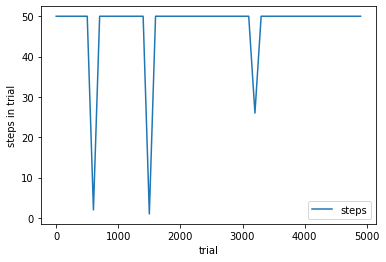

In [13]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


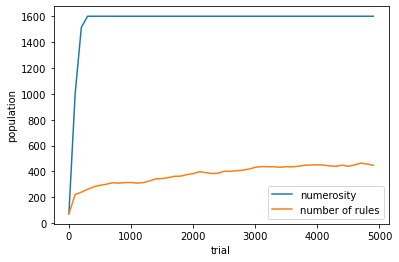

In [14]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.